In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/DE/ML/Datasets/AIML/Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
data.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
data.isna().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual_Income_(k$),0
Spending_Score,0


<Axes: >

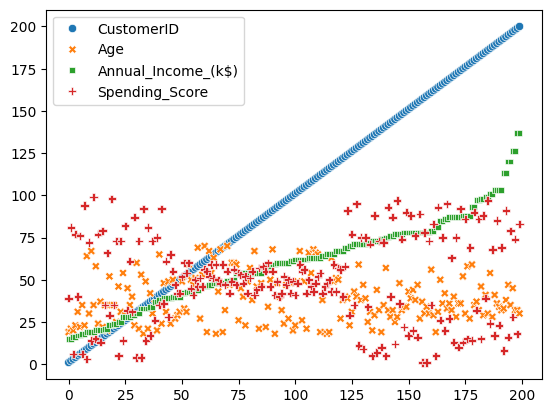

In [ ]:
sns.scatterplot(data)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Genre'] = le.fit_transform(data['Genre'])

In [ ]:
data = data[['Annual_Income_(k$)', 'Spending_Score']]
data

,Annual_Income_(k$),Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


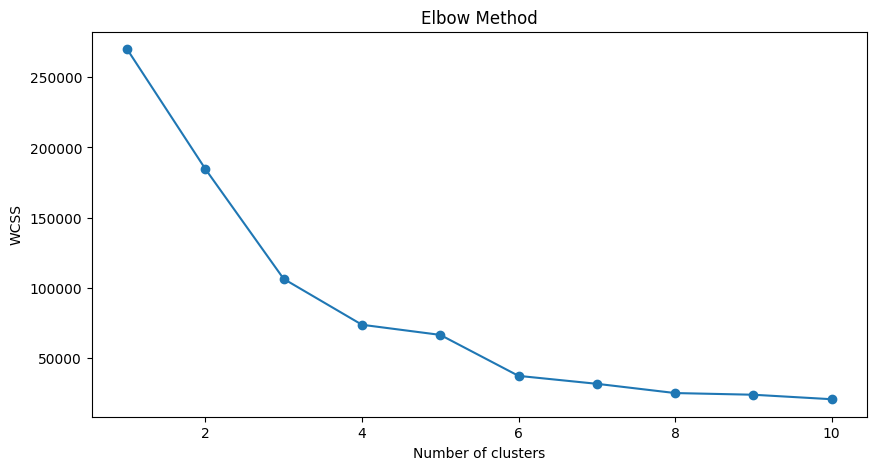

In [ ]:
from sklearn.cluster import KMeans
inertias = []

for i in range(1, 11):
  model = KMeans(n_clusters=i)
  model.fit(data)
  inertias.append(model.inertia_)

plt.figure(figsize = (10, 5))
plt.plot(range(1, 11), inertias)
plt.scatter(range(1, 11), inertias)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [ ]:
model = KMeans(n_clusters=5, init='k-means++') # Reinitiate - init
clusters_array = model.fit_predict(data)
data['Cluster'] = clusters_array

In [ ]:
print(model.inertia_)
print(model.labels_)

44448.45544793369
[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 2 4 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 2 1 0 1 0 1 2 1 0 1 0 1 0 1 0 1 2 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


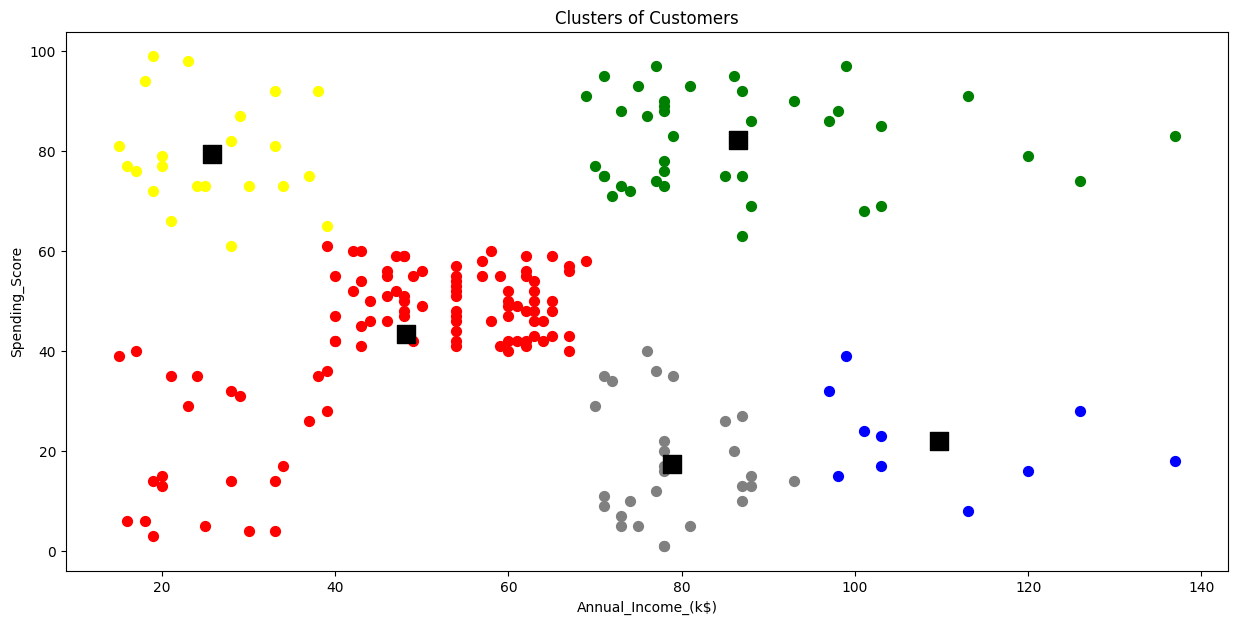

In [ ]:
plt.figure(figsize = (15, 7))
plt.scatter(data.iloc[clusters_array == 0, 0], data.iloc[clusters_array == 0, 1], color = 'red', label = 'Cluster1', s = 50)
plt.scatter(data.iloc[clusters_array == 1, 0], data.iloc[clusters_array == 1, 1], color = 'blue', label = 'Cluster2', s = 50)
plt.scatter(data.iloc[clusters_array == 2, 0], data.iloc[clusters_array == 2, 1], color = 'green', label = 'Cluster3', s = 50)
plt.scatter(data.iloc[clusters_array == 3, 0], data.iloc[clusters_array == 3, 1], color = 'grey', label = 'Cluster4', s = 50)
plt.scatter(data.iloc[clusters_array == 4, 0], data.iloc[clusters_array == 4, 1], color = 'yellow', label = 'Cluster5', s = 50)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], color = 'black', label = 'Centroids', marker = 's', s = 150)
plt.title("Clusters of Customers")
plt.xlabel("Annual_Income_(k$)")
plt.ylabel("Spending_Score")
plt.show()

In [ ]:
data # Can be used for Classification

,Annual_Income_(k$),Spending_Score,Cluster
0,15,39,0
1,15,81,4
2,16,6,0
3,16,77,4
4,17,40,0
...,...,...,...
195,120,79,2
196,126,28,1
197,126,74,2
198,137,18,1
